In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import signal, linalg

import sympy

from sklearn.decomposition import FastICA

# Import Algorithm

In [2]:
from parallel_ica import perform_fastica, inverse_fastica

# Generate Independent Signals

In [3]:
time = np.linspace(0, 30, 1000)
s1 = 1.4 * np.cos(time)
s2 = signal.sawtooth(time)
s3 = signal.square(time)

In [4]:
S = np.c_[s1, s2, s3]
S = S / S.std(axis=0)
colors = ['red', 'blue', 'green', 'orange']

# Visualize Signals

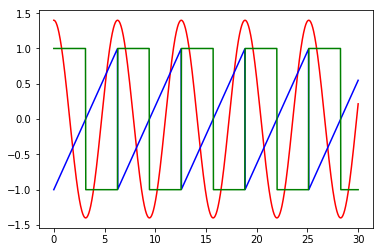

In [5]:
for i, s in enumerate([s1, s2, s3]):
    plt.plot(time, s, color = colors[i])
   
plt.show();

# Test for Independence 

With the signals forming the rows of the matrix, reduce the matrix to echelon form. 
If the matrix of reduced echelon form does not have a row of all zeros, than the rows are linearly independent.

In [6]:
M = sympy.Matrix(S.T)

In [7]:
echelon_s = np.array(M.rref()[0])

https://stackoverflow.com/questions/23726026/finding-which-rows-have-all-elements-as-zeros-in-a-matrix-with-numpy

In [8]:
(echelon_s == 0).all(axis=1)

array([False, False, False])

# Mixing Matrix

In [9]:
A = np.array([[2.5, 4.1, 3], 
              [1.2, 0.5, 2.3],
              [3.2, 3.1, 0.9]])

X = np.dot(S, A.T)

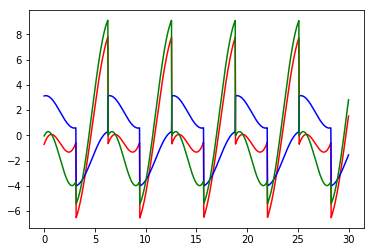

In [10]:
for i in range(X.shape[1]):
    plt.plot(time, X[:, i], color = colors[i])

# Perform FastICA

In [11]:
mixing, sources, X_mean = perform_fastica(X, n_components=3)

## Test to Make Sure Signal Can be Reconstructed

In [12]:
X_ = np.dot(sources, mixing.T) + X_mean
np.allclose(X_, X)

False

In [13]:
mixing

array([[ 87.4828508 , -15.41549289, -47.26825589],
       [ 39.30577272,  60.35018956,  -0.98856295],
       [105.77279733, -53.30614758, -25.58094102]])

In [14]:
X_mean

array([-0.24171249,  0.02240616, -0.30859588])

In [15]:
X.T.mean(axis=-1)

array([ 1.19904087e-16, -1.60094160e-16,  2.68673972e-16])

In [16]:
ica.mean_

NameError: name 'ica' is not defined

# Compare to Scikit-learn Implementation

In [ ]:
ica = FastICA(n_components=4)
sk_sources = ica.fit_transform(X)

np.allclose(X, np.dot(sk_sources, ica.mixing_.T) + ica.mean_)

In [ ]:
for i, s in enumerate([s1, s2, s3, s4]):
    plt.plot(time, s, color = colors[i])
   
plt.show();

In [ ]:
for i in range(sk_sources.shape[1]):
    plt.plot(time, sk_sources[:, i], color = colors[i])

In [ ]:
for i in range(sources.shape[1]):
    plt.plot(time, sources[:, i], color = colors[i])

In [ ]:
ica.fit(X)
ica.mean_

In [ ]:
X.T.mean(axis=-1)

In [ ]:
X_mean

In [ ]:
np.allclose(X, np.dot(sources, mixing.T) + X_mean)

In [ ]:
sources.shape

In [ ]:
for row in range(X.shape[1]):
    plt.plot(time, X[:, row])

In [ ]:
ica.components_.shape

In [ ]:
S_ = ica.transform(X)

In [ ]:
S_.shape

In [ ]:
for row in range(sources.shape[1]):
    plt.plot(time, S_[:, row])

In [ ]:
mixing

In [ ]:
ica = FastICA()
ica.fit(S)
ica.mixing_

In [ ]:
ica.mean_

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 30, 1000)
s1 = 1.4 * np.cos(time)
s2 = signal.sawtooth(time)
s3 = signal.square(time)
s4 = 0.8 * np.sin(time - 5)

S = np.c_[s1, s2, s3, s4]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1, 1], 
              [0.5, 2, 1.0, 0.8], 
              [1.5, 1.0, 2.0, 3.5],
              [2.4, 0.5, 4, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=4)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange', 'green']

plt.figure(figsize=(10, 10))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()